In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter   
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data_dir = "C:\\KIMUJUNG\\team_project\\data\\"
# df = pd.read_csv(data_dir + 'data_totla_split_non_index.csv')
# df = pd.read_csv(data_dir + 'user_gender_encoded.csv')
df = pd.read_csv(data_dir + 'final_data.csv')
df.head(2)

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.0,1.0,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.0,0.0,...,2,145,84,58,42,1678,1158,448313.054,2168,220


In [41]:
df['gender'].value_counts()

gender
1    187836
0    168441
Name: count, dtype: int64

In [44]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

In [45]:
X = df.drop(['is_churn'],axis=1)
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
skf = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(random_state=42)
params = {
    # "max_depth": [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
    "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train_scaled, y_train)
print(gscv_tree.best_estimator_)

DecisionTreeClassifier(max_depth=11, random_state=42)


In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(max_depth=11, random_state=42)

dt_accuracy = []
dt_precision = []
dt_recall = []
dt_matrix = []
dt_currve = []

for train_index, val_index in stratified_kfold.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    y_pred_dt = dt_clf.predict(X_val)

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt))
    dt_precision.append(precision_score(y_val, y_pred_dt))
    dt_recall.append(recall_score(y_val, y_pred_dt))
    dt_matrix.append(confusion_matrix(y_val, y_pred_dt))
    dt_currve.append(roc_curve(y_val, y_pred_dt))

print("의사결정나무 정확도:", np.mean(dt_accuracy))
print("의사결정나무 정밀도:", np.mean(dt_precision))
print("의사결정나무 재현율:", np.mean(dt_recall))

의사결정나무 정확도: 0.8762984757462711
의사결정나무 정밀도: 0.6932997120518399
의사결정나무 재현율: 0.5290680177945998


In [51]:
dt_matrix

[array([[55971,  2790],
        [ 5616,  6879]], dtype=int64),
 array([[56217,  2544],
        [ 6112,  6383]], dtype=int64),
 array([[55584,  3177],
        [ 5942,  6552]], dtype=int64),
 array([[55558,  3202],
        [ 5722,  6773]], dtype=int64),
 array([[55822,  2938],
        [ 6029,  6466]], dtype=int64)]

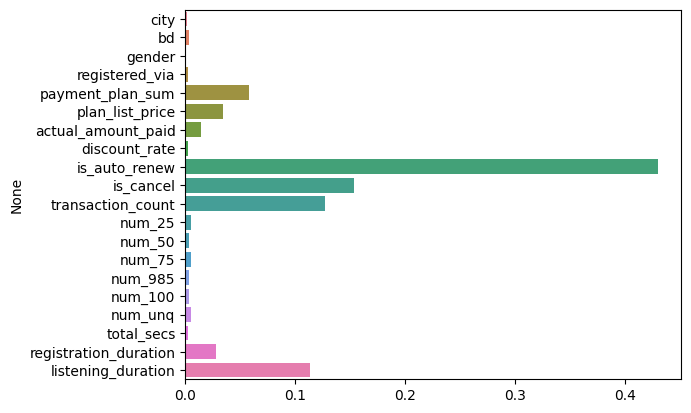

In [52]:
# 특성 중요도
dt_clf.feature_importances_

sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns, hue=X_train.columns)
plt.show()

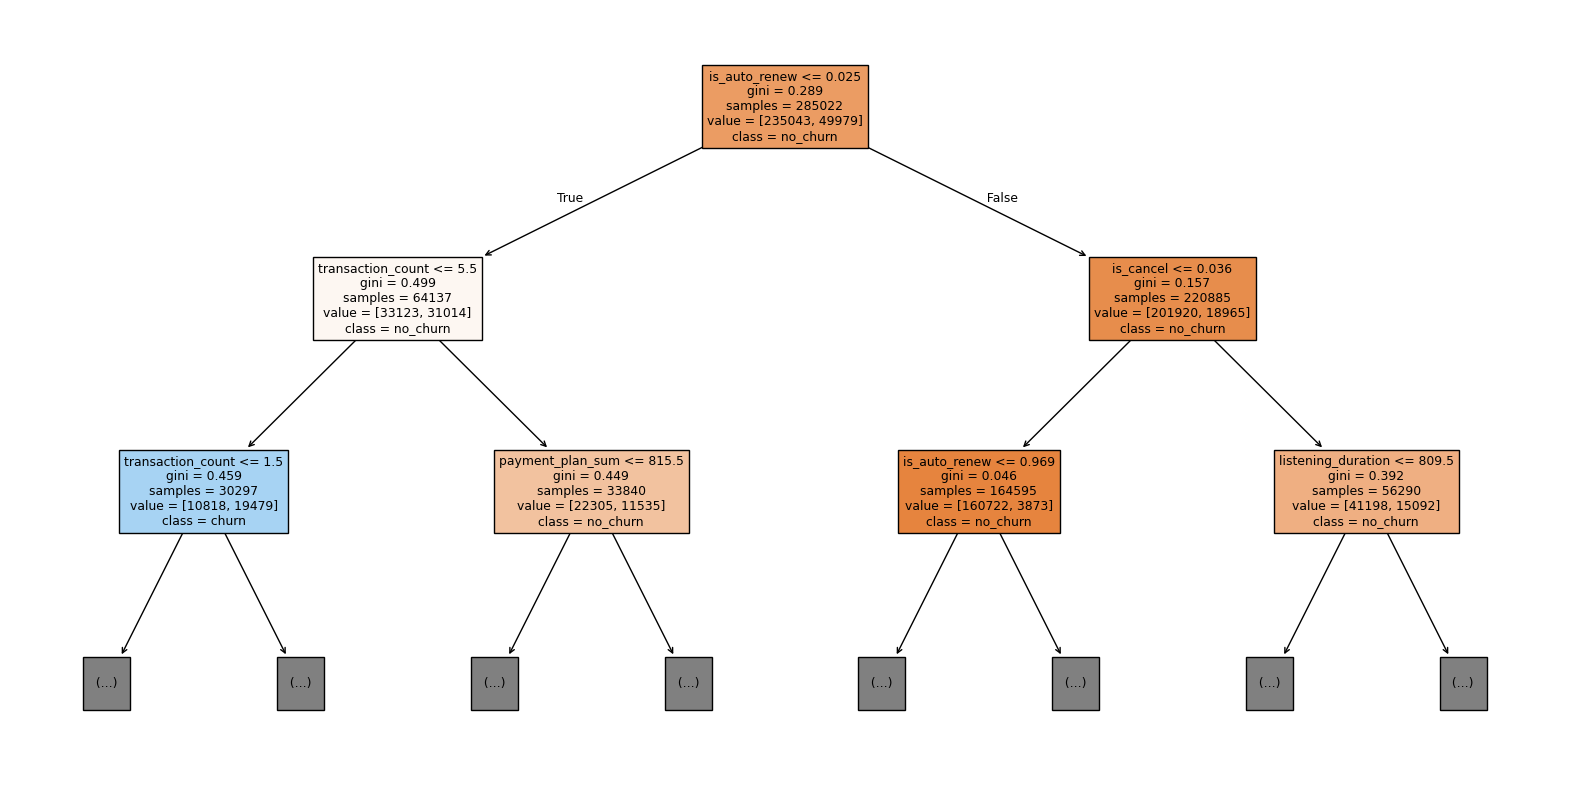

In [53]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=['no_churn','churn'], 
    max_depth=2
)
plt.show()

In [54]:
counter = Counter(y)
print(counter)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({0: 293803, 1: 62474})
Counter({0: 293803, 1: 293803})


In [ ]:
skf = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [50,55,60,65,70,75,80,85,90,95,100]
    # "max_depth": [46,47,48,49,50,51,52,53,54]
    # "max_depth": [26,27,28,29,30,35,40,45,50]
    # "max_depth": [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
    # "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train_scaled, y_train)
print(gscv_tree.best_estimator_)

In [28]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(max_depth=51, random_state=42)

dt_accuracy = []
dt_precision = []
dt_recall = []

for train_index, val_index in stratified_kfold.split(X_res, y_res):
    X_train, y_train = X_res.iloc[train_index], y_res.iloc[train_index]
    X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    y_pred_dt = dt_clf.predict(X_val)   # 검증 데이터로 예측

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt)) 
    
    dt_precision.append(precision_score(y_val, y_pred_dt)) 
    
    dt_recall.append(recall_score(y_val, y_pred_dt)) 

print("의사결정나무 정확도:", np.mean(dt_accuracy))
print("의사결정나무 정밀도:", np.mean(dt_precision))
print("의사결정나무 재현율:", np.mean(dt_recall))

의사결정나무 정확도: 0.9800677973282292
의사결정나무 정밀도: 0.9618401845709045
의사결정나무 재현율: 0.999802247574047


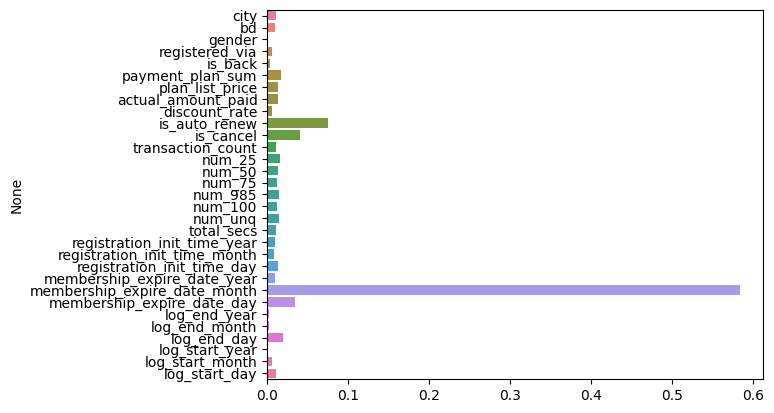

In [29]:
# 특성 중요도
dt_clf.feature_importances_

sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns, hue=X_train.columns)
plt.show()

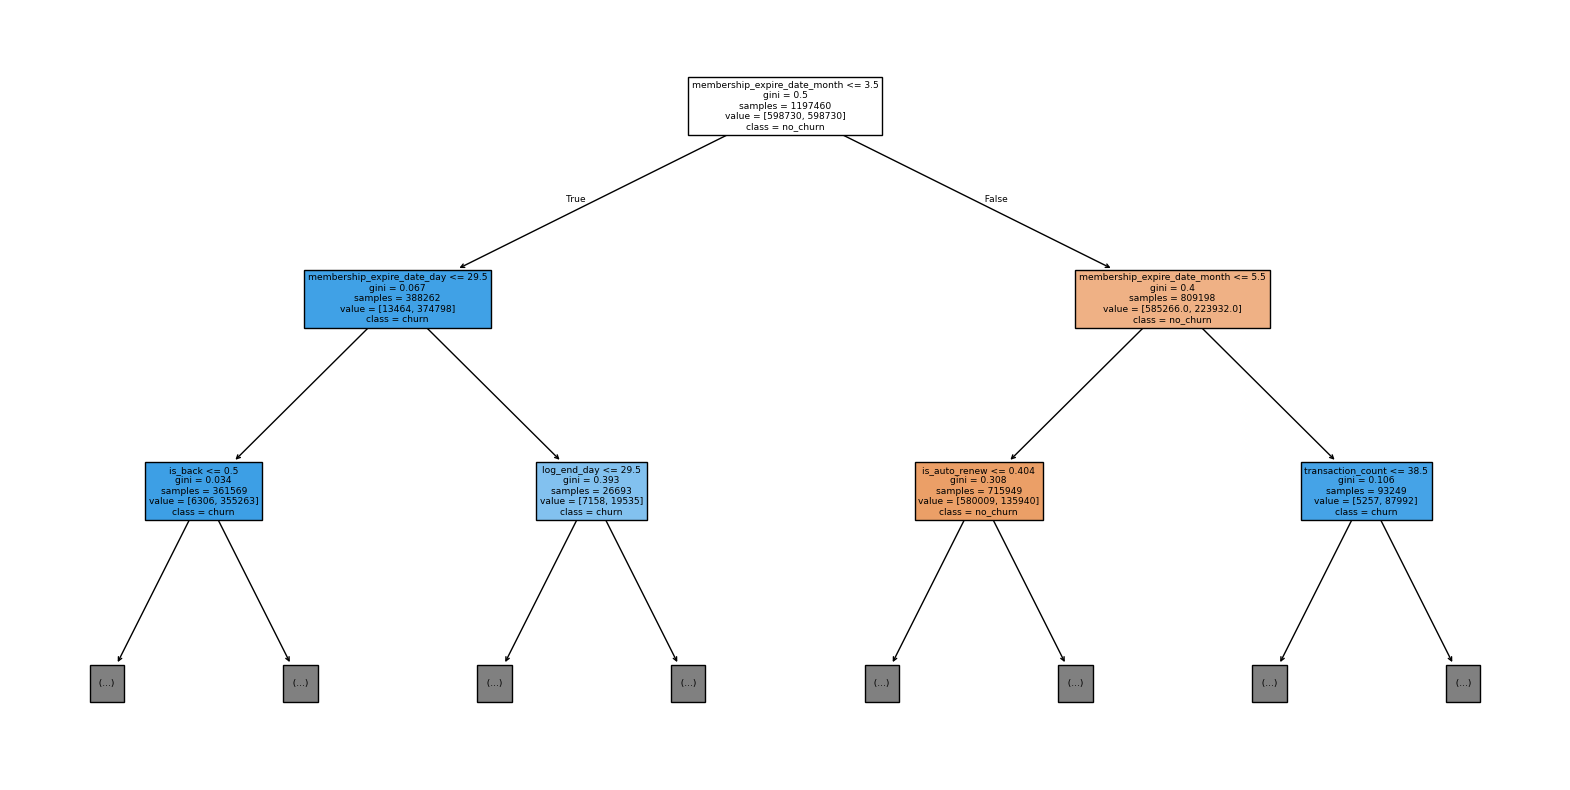

In [30]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=['no_churn','churn'], 
    max_depth=2
)
plt.show()

In [31]:
X_res.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'is_cancel', 'transaction_count', 'num_25', 'num_50',
       'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'membership_expire_date_year',
       'membership_expire_date_month', 'membership_expire_date_day',
       'log_end_year', 'log_end_month', 'log_end_day', 'log_start_year',
       'log_start_month', 'log_start_day'],
      dtype='object')

In [32]:
X_new = X_res.drop(['membership_expire_date_month','membership_expire_date_day','membership_expire_date_year','is_back'],axis=1)
y_new = y_res

In [36]:
X_new.shape

(1496824, 27)

In [33]:
stratified_kfold = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(max_depth=51, random_state=42)

dt_accuracy = []
dt_precision = []
dt_recall = []

for train_index, val_index in stratified_kfold.split(X_new, y_new):
    X_train, y_train = X_new.iloc[train_index], y_new.iloc[train_index]
    X_val, y_val = X_new.iloc[val_index], y_new.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    y_pred_dt = dt_clf.predict(X_val)   # 검증 데이터로 예측

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt)) 
    
    dt_precision.append(precision_score(y_val, y_pred_dt)) 
    
    dt_recall.append(recall_score(y_val, y_pred_dt)) 

print("의사결정나무 정확도:", np.mean(dt_accuracy))
print("의사결정나무 정밀도:", np.mean(dt_precision))
print("의사결정나무 재현율:", np.mean(dt_recall))

의사결정나무 정확도: 0.9708115323348201
의사결정나무 정밀도: 0.9450626179464953
의사결정나무 재현율: 0.9997421199609839


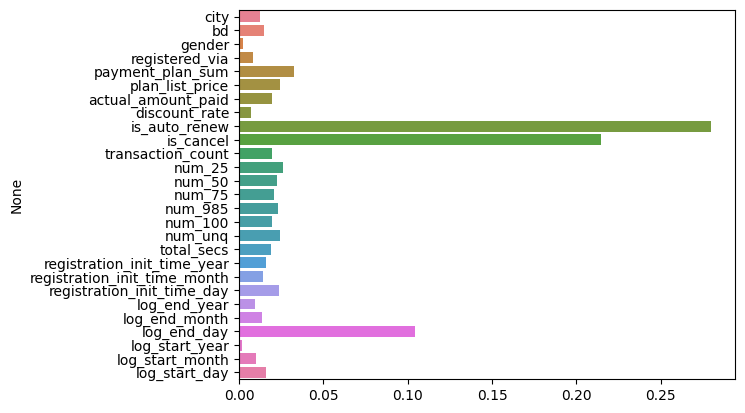

In [34]:
# 특성 중요도
dt_clf.feature_importances_

sns.barplot(x=dt_clf.feature_importances_, y=X_train.columns, hue=X_train.columns)
plt.show()

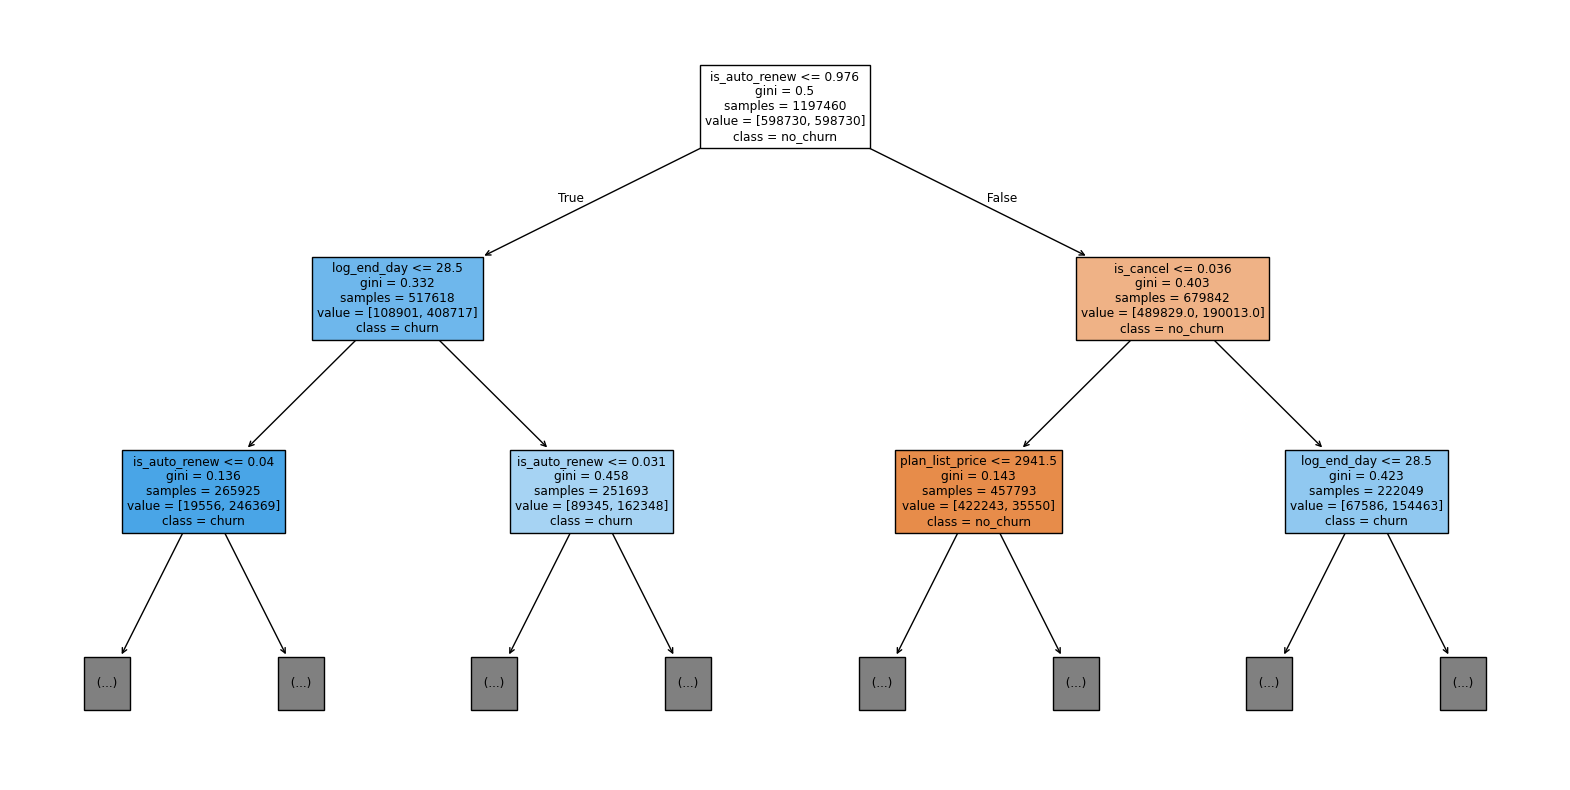

In [35]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=['no_churn','churn'], 
    max_depth=2
)
plt.show()